In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
##########
# Task 2 #
##########

In [3]:
# Bifurcation diagram #

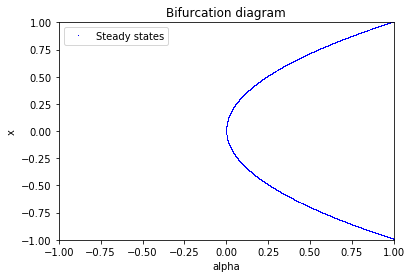

In [4]:
Alpha = []
X1 = []
X2 = []
alpha_range = np.linspace(0, 1, int(1/0.0001))
    
# plot bifurcation equation for different range of alpha
for alpha in alpha_range:
    x = 0.01; 
    for i in range(5):
        Alpha.append(alpha)
        X1.append(math.sqrt(alpha))
        X2.append(-math.sqrt(alpha))

        
        
# Plot the data 
plt.plot(Alpha, X1, ls='', marker=',',color='blue', label='Steady states')
plt.plot(Alpha, X2, ls='', marker=',',color='blue')
plt.legend()
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xlabel('alpha')
plt.ylabel('x')
plt.title("Bifurcation diagram")
plt.show()

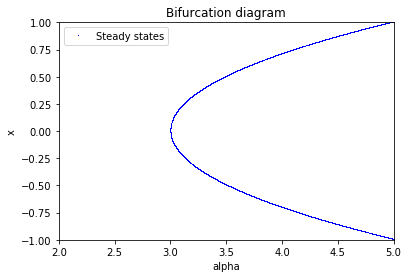

In [5]:
Alpha = []
X1 = []
X2 = []
alpha_range = np.linspace(3, 5, int(1/0.0001))
    
for alpha in alpha_range:
    x = 0.02; 
    for i in range(5):
        Alpha.append(alpha)
        X1.append(math.sqrt((alpha-3)/2))
        X2.append(-math.sqrt((alpha-3)/2))
        
        
    # Plot the data 
plt.plot(Alpha, X1, ls='', marker=',',color='blue', label='Steady states')
plt.plot(Alpha, X2, ls='', marker=',',color='blue')
plt.legend()
plt.ylim(-1, 1)
plt.xlim(2, 5)
plt.xlabel('alpha')
plt.ylabel('x')
plt.title("Bifurcation diagram")
plt.show()

In [ ]:
##########
# task 3 #
##########

In [ ]:
# Plot phase diagrams

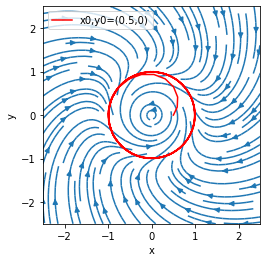

In [10]:
alpha = 1

def dF(r, theta):
    return r*(alpha - r**2), 1

X, Y = np.meshgrid(np.linspace(-2.5, 2.5, 500), np.linspace(-2.5, 2.5, 500))
u, v = np.zeros_like(X), np.zeros_like(X)
NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        x, y = X[i, j], Y[i, j]
        r, theta = (x**2 + y**2)**0.5, np.arctan2(y, x)
        fp = dF(r, theta)
        u[i,j] = (r + fp[0]) * np.cos(theta + fp[1]) - x
        v[i,j] = (r + fp[0]) * np.sin(theta + fp[1]) - y

plt.streamplot(X, Y, u, v)
plt.axis('square')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.plot(X_orbit, Y_orbit, label = 'x0,y0=(0.5,0)', color='red')  # to plot the orbit once the cell under has been run
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Plot orbits 

In [8]:
from scipy import integrate

r0 :0.5, theta0: 0.0


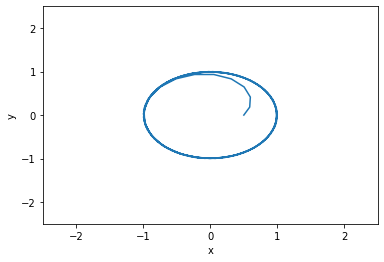

In [9]:
x0 = 0.5
y0 = 0

alpha = 1

def f(t, R):
    r = R[0]
    theta = R[1]
    return [r*(alpha - r**2), 1]

t_span = np.array([0,30])
times = np.linspace(t_span[0], t_span[1], 100)

r0 = math.sqrt(x0**2 + y0**2)
theta0 = math.atan(y0/x0)
print('r0 :{}, theta0: {}'.format(r0,theta0))

sol = integrate.solve_ivp(f, t_span, np.array([r0, theta0]), t_eval = times)
r = sol.y[0]
theta = sol.y[1]

# Conversion
X_orbit, Y_orbit = np.zeros(len(r)), np.zeros(len(r))
for i in range(len(r)):
    X_orbit[i] = r[i]*math.cos(theta[i])
    Y_orbit[i] = r[i]*math.sin(theta[i])


plt.plot(X_orbit, Y_orbit, label = 'solve_ivp')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.show()

In [ ]:
# Plot 3D surface

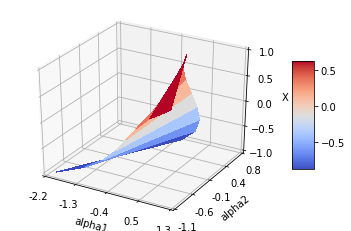

In [11]:
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# I computed alpha1 depending on Z value and then change axis. 
# The purpose of this was to express alpha1 on the ohter variables in order to use the mplot3d module.
X = np.arange(-1, 1, 0.25)
alpha2 = np.arange(-1, 1, 0.25)
X, alpha2 = np.meshgrid(X, alpha2)
alpha1 = X**3 - X*alpha2

# Plot the surface.
surf = ax.plot_surface(alpha1, alpha2, X, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize axis
ax.set_xlabel('alpha1')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(LinearLocator(5))

ax.set_ylabel('alpha2')
ax.yaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_zlabel('X')
ax.set_zlim(-1.0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(5))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
